Mean Median Imputation - This is the act of removin missing (NA) values with Mean & Median


Note: If the variable has Gaussian Distribution we replace with mean

If the variable has a Skewed distribution then we replace with median 

Classification problem

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer

In [2]:
titanic_dataset = pd.read_csv('/Users/nandrajog/Downloads/titanic.csv',low_memory=False)

In [3]:
crop_dataset = titanic_dataset[['Survived','Age','Fare']]

In [4]:
crop_dataset.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(crop_dataset,titanic_dataset.Survived,
                                                    train_size =0.7,random_state=0)


In [22]:
def Impute_na(df,col,median):
    df[col+"_median"] = df[col].fillna(median)
    df[col+"_zero"] = df[col].fillna(0)

In [23]:
median = crop_dataset.Age.median()
print(median)

28.0


In [24]:
Impute_na(X_train,'Age',median)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
X_train.head(15)

,Survived,Age,Fare,Age_median,Age_zero
857,1,51.0,26.5500,51.0,51.0
52,1,49.0,76.7292,49.0,49.0
386,0,1.0,46.9000,1.0,1.0
124,0,54.0,77.2875,54.0,54.0
578,0,NaN,14.4583,28.0,0.0
549,1,8.0,36.7500,8.0,8.0
118,0,24.0,247.5208,24.0,24.0
12,0,20.0,8.0500,20.0,20.0
157,0,30.0,8.0500,30.0,30.0
127,1,24.0,7.1417,24.0,24.0


In [26]:
Impute_na(X_test,'Age',median)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
X_test

,Survived,Age,Fare,Age_median,Age_zero
495,0,NaN,14.4583,28.0,0.0
648,0,NaN,7.5500,28.0,0.0
278,0,7.0,29.1250,7.0,7.0
31,1,NaN,146.5208,28.0,0.0
255,1,29.0,15.2458,29.0,29.0
...,...,...,...,...,...
263,0,40.0,0.0000,40.0,40.0
718,0,NaN,15.5000,28.0,0.0
620,0,27.0,14.4542,27.0,27.0
786,1,18.0,7.4958,18.0,18.0


Now plot and see how the distribution changes when we replace the (NA) value with MEDIAN

In [61]:
print('Original Variance:', X_train['Age'].std())
print('Variance After adding median imputation:', X_train['Age_median'].std())

Original Variance: 14.506993804588454
Variance After adding median imputation: 13.041768507865857


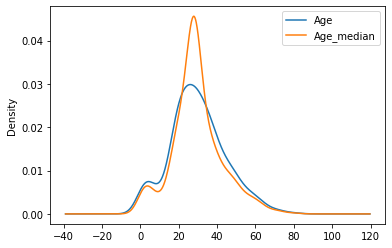

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind = 'kde',ax=ax)
X_train.Age_median.plot(kind='kde')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Now plot and see how the distribution changes when we replace the (NA) with Zero

In [63]:
print('Variance After adding ZERO imputation:', X_train['Age_zero'].std())
print('Variance After adding Median imputation:', X_train['Age_median'].std())
print('Original data:', X_train['Age'].std())

Variance After adding ZERO imputation: 17.600953604473293
Variance After adding Median imputation: 13.041768507865857
Original data: 14.506993804588454


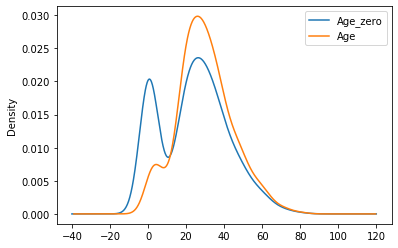

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age_zero'].plot(kind ='kde')
X_train['Age'].plot(kind='kde')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [86]:
median_test = X_test.Age.median()
print(median_test)

27.0


In [87]:
Impute_na(X_test,'Age',median_test)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
X_test

,Survived,Age,Fare,Age_median,Age_zero
495,0,NaN,14.4583,27.0,0.0
648,0,NaN,7.5500,27.0,0.0
278,0,7.0,29.1250,7.0,7.0
31,1,NaN,146.5208,27.0,0.0
255,1,29.0,15.2458,29.0,29.0
...,...,...,...,...,...
263,0,40.0,0.0000,40.0,40.0
718,0,NaN,15.5000,27.0,0.0
620,0,27.0,14.4542,27.0,27.0
786,1,18.0,7.4958,18.0,18.0


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score ,confusion_matrix 

Age_Zero Imputation

In [96]:
logit = LogisticRegression(random_state=44,C=1.0)
logit.fit(X_train[['Age_zero','Fare']],Y_train)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=44, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
print("Train set Zero Imputation")
pred_train = logit.predict_proba(X_train[['Age_zero','Fare']])
print("Logistic Regression roc_auc: {}".format(roc_auc_score(Y_train,pred_train[:,1])))
print("Test set zero imputation")
pred_test = logit.predict_proba(X_test[['Age_zero','Fare']])
print("Logistic Regression roc-auc: {}".format(roc_auc_score(Y_test,pred_test[:,1])))

Train set Zero Imputation
Logistic Regression roc_auc: 0.6856413092991476
Test set zero imputation
Logistic Regression roc-auc: 0.7132142857142858


Age_Median Imputation

In [99]:
logit.fit(X_train[['Age_median', 'Fare']],Y_train)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=44, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
print("Train set Median Imputation")
pred_train = logit.predict_proba(X_train[['Age_median','Fare']])
print("Logistic Regression roc_auc: {}".format(roc_auc_score(Y_train,pred_train[:,1])))
print("Test set Median imputation")
pred_test = logit.predict_proba(X_test[['Age_median','Fare']])
print("Logistic Regression roc-auc: {}".format(roc_auc_score(Y_test,pred_test[:,1])))

Train set Median Imputation
Logistic Regression roc_auc: 0.6781957007440186
Test set Median imputation
Logistic Regression roc-auc: 0.7251785714285715


HERE WE OBSERVED THAT DATA WITH MEDIAN IMPUTATION WORKS WELL. ------->WHY?

In [105]:
print("Average total Survival:", X_train.Survived.mean())

Average total Survival: 0.3884430176565008


In [109]:
print("Average real survived of children:", X_train[X_train.Age < 15].Survived.mean())
print("Average Survival of children when using Age imputation with Zero:", X_train[X_train.Age_zero < 15].Survived.mean())
print("Average Survival of children when using Age imputation with Median:", X_train[X_train.Age_median < 15].Survived.mean())

Average real survived of children: 0.5740740740740741
Average Survival of children when using Age imputation with Zero: 0.38857142857142857
Average Survival of children when using Age imputation with Median: 0.5740740740740741


Here what we observed, people less then 15 year of age has a good chance to survived (0.57), If we replace the value with Zero we masking out AGE effect (0.38), On the other hand if we replace the value with median er are preserving the AGE effect (0.57)

.

Lets do with House price dataset

This is Regression problem

In [209]:
house_price = pd.read_csv('/Users/nandrajog/Downloads/House-price.csv',low_memory=False)

In [210]:
pd.DataFrame(house_price.isna().mean()).head(5)

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,0.177397
LotArea,0.000000


In [211]:
house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [212]:
house_price_croped = house_price[['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea',
                                 'WoodDeckSF','BsmtUnfSF','LotFrontage','MasVnrArea','GarageYrBlt','SalePrice']]

In [213]:
pd.DataFrame(house_price_croped.isna().sum())

,0
OverallQual,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
WoodDeckSF,0
BsmtUnfSF,0
LotFrontage,259
MasVnrArea,8
GarageYrBlt,81
SalePrice,0


In [214]:
X_train,X_test,Y_train,Y_test = train_test_split(house_price_croped,house_price_croped.SalePrice,
                                                train_size =0.80,random_state=0)

In [215]:
mean = X_train.LotFrontage.mean()
print(mean)

69.61401673640168


In [216]:
def Imputer_na(df,col,mean):
    df[col +'_mean'] = df[col].fillna(mean)
    df[col +'_Zero'] = df[col].fillna(0)

In [217]:
Imputer_na(X_train,'LotFrontage',mean)
Imputer_na(X_test,'LotFrontage',mean)
Imputer_na(X_train,'MasVnrArea',mean)
Imputer_na(X_test,'MasVnrArea',mean)
Imputer_na(X_train,'GarageYrBlt',mean)
Imputer_na(X_test,'GarageYrBlt',mean)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [218]:
X_train

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,LotFrontage_mean,LotFrontage_Zero,MasVnrArea_mean,MasVnrArea_Zero,GarageYrBlt_mean,GarageYrBlt_Zero
618,9,1822,1828,1828,0,1774,90.0,452.0,2007.0,314813,90.000000,90.0,452.0,452.0,2007.0,2007.0
870,5,894,894,894,0,894,60.0,0.0,1962.0,109500,60.000000,60.0,0.0,0.0,1962.0,1962.0
92,5,876,964,964,0,163,80.0,0.0,1921.0,163500,80.000000,80.0,0.0,0.0,1921.0,1921.0
817,8,1568,1689,1689,150,350,NaN,148.0,2002.0,271000,69.614017,0.0,148.0,148.0,2002.0,2002.0
302,7,1541,1541,1541,468,1541,118.0,150.0,2001.0,205000,118.000000,118.0,150.0,150.0,2001.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,8,1252,1268,2365,0,89,82.0,673.0,1999.0,337000,82.000000,82.0,673.0,673.0,1999.0,1999.0
835,4,1067,1067,1067,290,625,60.0,0.0,1996.0,128000,60.000000,60.0,0.0,0.0,1996.0,1996.0
1216,6,0,1318,1902,0,0,68.0,0.0,1978.0,112000,68.000000,68.0,0.0,0.0,1978.0,1978.0
559,7,1374,1557,1557,143,1374,NaN,18.0,2003.0,234000,69.614017,0.0,18.0,18.0,2003.0,2003.0


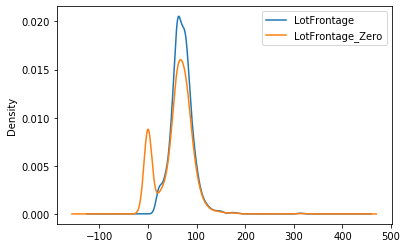

In [221]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind = 'kde')
X_train['LotFrontage_Zero'].plot(kind='kde')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

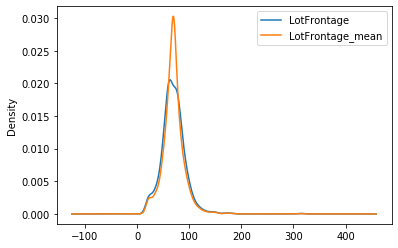

In [222]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind ='kde')
X_train['LotFrontage_mean'].plot(kind = 'kde')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

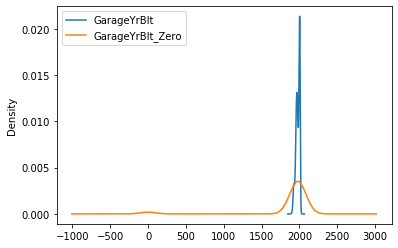

In [223]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['GarageYrBlt'].plot(kind = 'kde')
X_train['GarageYrBlt_Zero'].plot(kind = 'kde')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

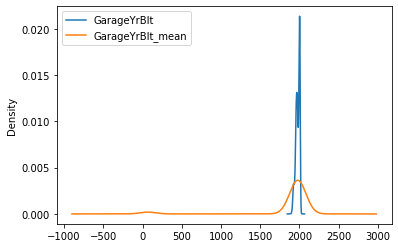

In [225]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['GarageYrBlt'].plot(kind = 'kde')
X_train['GarageYrBlt_mean'].plot(kind = 'kde')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [227]:
clf_linear_regression = LinearRegression()

In [228]:
X_train.columns

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
       'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice',
       'LotFrontage_mean', 'LotFrontage_Zero', 'MasVnrArea_mean',
       'MasVnrArea_Zero', 'GarageYrBlt_mean', 'GarageYrBlt_Zero'],
      dtype='object')

In [229]:
X_test_zero = X_test[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
       'BsmtUnfSF',  
        'LotFrontage_Zero', 
       'MasVnrArea_Zero', 'GarageYrBlt_Zero']]

In [230]:
X_train_zero =X_train[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
       'BsmtUnfSF',  
        'LotFrontage_Zero', 
       'MasVnrArea_Zero', 'GarageYrBlt_Zero']]

In [231]:
X_train.columns

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
       'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice',
       'LotFrontage_mean', 'LotFrontage_Zero', 'MasVnrArea_mean',
       'MasVnrArea_Zero', 'GarageYrBlt_mean', 'GarageYrBlt_Zero'],
      dtype='object')

In [238]:
X_train_mean = X_train[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
       'BsmtUnfSF',
       'LotFrontage_mean', 'MasVnrArea_mean', 'GarageYrBlt_mean',]]
X_test_mean = X_test[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
       'BsmtUnfSF',
       'LotFrontage_mean', 'MasVnrArea_mean', 'GarageYrBlt_mean',]]

In [255]:
clf_linear_regression.fit(X_train_zero,X_train.SalePrice)
print("Train with Zero Imputation")
score = clf_linear_regression.score(X_train_zero,X_train.SalePrice)
# print("Score with Zero Imputation {}".format(score))
predictions_train= clf_linear_regression.predict(X_train_zero)
print("MSE with Zero Imputation  on Train set {}".format(mean_squared_error(Y_train,predictions_train)))

predictions= clf_linear_regression.predict(X_test_zero)
print("MSE with Zero Imputation  on Test set {}".format(mean_squared_error(Y_test,predictions)))



Train with Zero Imputation
MSE with Zero Imputation  on Train set 1214293740.9385893
MSE with Zero Imputation  on Test set 2733996296.8968287


In [256]:
clf_linear_regression.fit(X_train_mean,Y_train)
print("Train with Mean Imputation ")
score  = clf_linear_regression.score(X_train_mean,Y_train)
# print("Score with Mean Imputation {}".format(score))
prediction_train = clf_linear_regression.predict(X_train_mean)
print("MSE with Mean Imputation  on Train set {}".format(mean_squared_error(Y_train,prediction_train)))
prediction_test = clf_linear_regression.predict(X_test_mean)
print("MSE with Mean Imputation  on Test set {}".format(mean_squared_error(Y_test,prediction_test)))


Train with Mean Imputation 
MSE with Mean Imputation  on Train set 1194898533.4832275
MSE with Mean Imputation  on Test set 2870536246.466173


This Shows If replacing Missing values with Zero is better then replacing with Mean value because Lower the MSE better the perfromance and MSE is lower in the case of ZERO whereas MSE is higher in the case of MEAN

In [ ]:
X_test.dropna

In [293]:
print("House price when LotFrontage is Missing" ,X_test[X_test['LotFrontage'].isnull()]['SalePrice'].mean())
print("House price when MasVnrArea is Missing" ,X_test[X_test['MasVnrArea'].isnull()]['SalePrice'].mean())
print("House price when GarageYrBlt is Missing" ,X_test[X_test['GarageYrBlt'].isnull()]['SalePrice'].mean())
# print("House price when OverallQual is Missing" ,X_test[X_test['OverallQual']]['SalePrice'].mean())



House price when LotFrontage is Missing 174233.59574468085
House price when MasVnrArea is Missing 200262.0
House price when GarageYrBlt is Missing 116071.73913043478


This shows when MasVnrArea is missing House Price is More Expensive, whereas GarageYrBlt missing house is less expensive &

